<a href="https://colab.research.google.com/github/github-ashwin/Python/blob/main/JobPostingPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction
!unzip real-or-fake-fake-jobposting-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0
Archive:  real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Select relevant columns and drop missing values
df = df[['title', 'description', 'requirements', 'fraudulent']].dropna()

# Combine text fields
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

# Text cleaning function
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['fraudulent'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced')

Accuracy: 0.9377675337504116

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      2876
           1       0.45      0.71      0.55       161

    accuracy                           0.94      3037
   macro avg       0.71      0.83      0.76      3037
weighted avg       0.95      0.94      0.94      3037



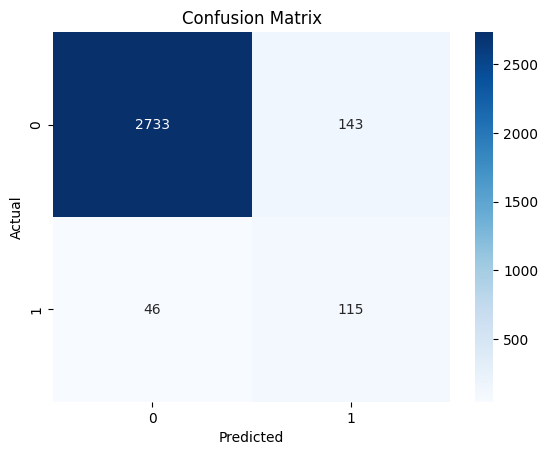

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_vec)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_job_post(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return "Fake" if prediction == 1 else "Real"

# Example usage
sample = "We are hiring for a data entry position. No experience required. Apply now!"
print("Prediction:", predict_job_post(sample))

Prediction: Fake
